<a href="https://colab.research.google.com/github/jsroa15/NLP/blob/main/NLP_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

In [ ]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

# Lemmatization

In [ ]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

# Text Cleaning

In [ ]:
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

In [ ]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

# Part of Speech Taging

In [ ]:
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

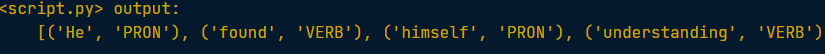

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

In [ ]:
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

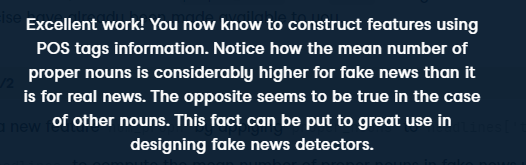

# NER

In [ ]:
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

<script.py> output:
    Sundar Pichai ORG
    Google ORG
    Mountain View GPE

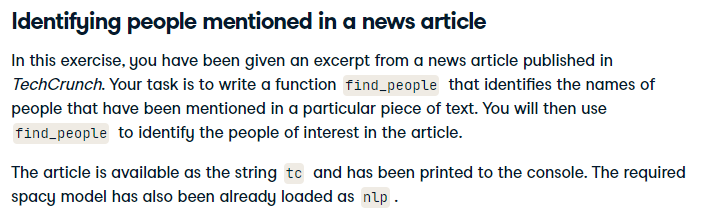

In [ ]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
  return persons

print(find_persons(tc))

# Bag of Words

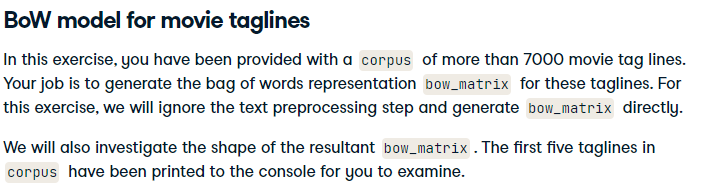

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)

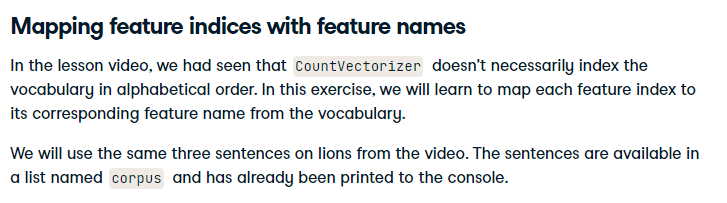

In [ ]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
print(bow_df)

# BOW vector for movie reviews

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

# Predicting the sentiment of a movie review

In [ ]:
# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

# TF IDF

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer=TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

# Cosine similarity

In [ ]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

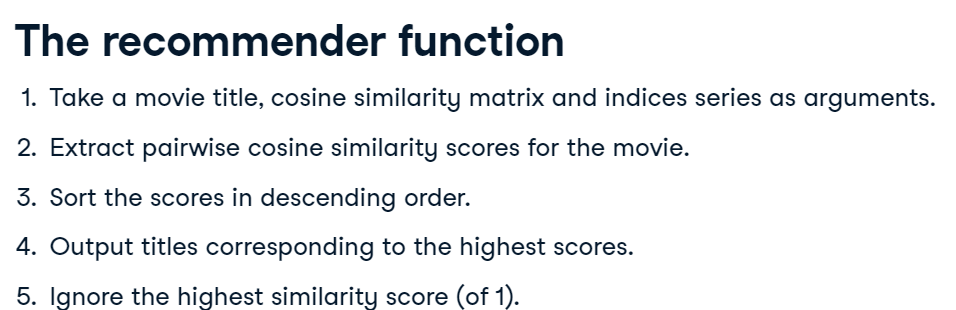

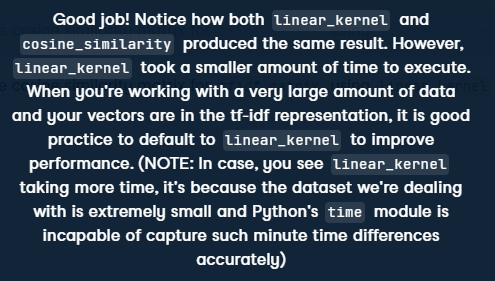

In [ ]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

# Recommendation Function

In [ ]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(transcripts)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('5 ways to kill your dreams', cosine_sim, indices))